## Introduction
In Part 9 KMeans Clustering vs LDA Topic Modeling. we did topic modeling on the 1941 papers mentioned Polymerase.

Link to Part 9 KMeans Clustering vs LDA Topic Modeling
#### https://www.kaggle.com/leijiang1/part-9-kmeans-clustering-vs-lda-topic-modeling


The topics identified as below:
### Topics:
#### G0 flu children clinical
#### G1 gene protein cell 
#### G2 bat host phylogenetic 
#### G3 SARS COV MERS COV
#### G4 diganosis asssay detection 
#### G5 RdRp RNA replication



#### Topic Modeling can help us quickly gain the big picture of the major topics in a large collection of papers. It also helps by giving a rough index so you know where to look for the type of information you want (which cluster you should go). For example, if you are looking for information about diagnosis assay, you should probably go to "Group 5 diagnosis assay detection" to find information faster. If you are interested about "children" and "clinical" related information, you should go to "Group 1 flu children clinical".

Group these papers also helps with question answering tasks. For example, we know which subgroup of paper to go and ask a question based on the main topic of the question.

## Interactive 3D visualization of Clusters

#### In addition, I created an interactive 3D plot of the previous 6 clusters of papers in Java. 
#### You can drag the mouse to change angles of view. 
#### It is interesting to see how the papers distributed in space and view the relative positions to other papers.
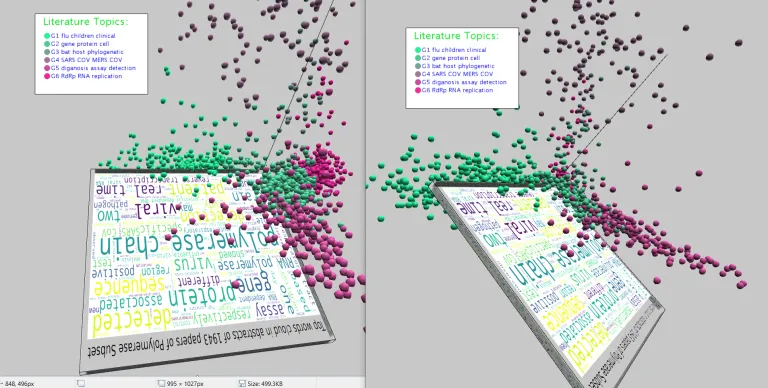

#### Figure 1. 3D visual
The code is on my GitHub.

https://github.com/lj89/Data-Visualization/tree/master/3Djava





## Method
#### Use these topics as labels, we can use the 1941 papers (subset on March 26) as a training dataset to build a classification model that classify new papers. I use 388 papers newly updated papers (subet of April 12-subset on March 26) as a Hold Out test dataset to give these new papers a topic label.

#### For this 6 classes classification problem:
### Random Forest (RF), XGBoost (XGB) and Multilayer perceptron (MLP) classifiers with good prediction accuracies are built.
#### In addition, ensemble model of all three is built to make the modle better generalizable.

### Steps:
#### Use Universal Sentence Encoder (USE) to vectorize abstracts to 512 dimension vectors.
#### Use the G0-5 as the true labels to train classifers.
#### Validate each classifier achieved good performance.
#### Majority vote of RF, GXB, MLP to generate the final prediction.

## Results

#### Since the new papers are without label, I used the three models to kind of cross validate the results.
XGB predictions match well with MLP predictions with 89.7% agreement.

XGB vs RF: agree on 81.2% of the predictions.

MLP vs RF: agree on 81.4% of the predictions. 


#### For the majority vote results, there are 10 instances that all three methods produce different predictions. So the majority vote would not work. For a problem like this with 6 classes, we need at least 7 different models to ensemble to make sure there is a majority vote result.


#### The performance of each type of model varies. The MLP model by itself yielded 0.8329 accuracy on a validation dataset.

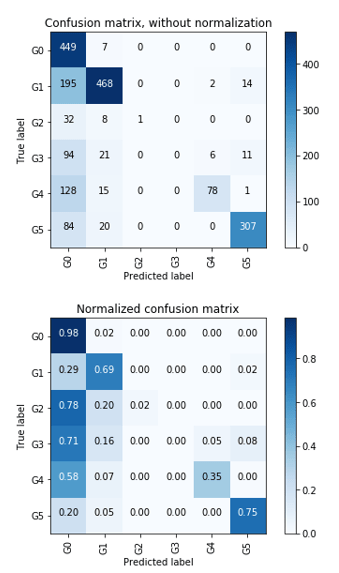
#### Figure 2. Confusion Matrix of the RF classifier for paper classification.


#### The table below shows the RF classifer performance. Group 2,3 had not so ideal results due to they are less common in the training dataset.
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       456
           1       0.87      0.69      0.77       679
           2       1.00      0.02      0.05        41
           3       0.00      0.00      0.00       132
           4       0.91      0.35      0.51       222
           5       0.92      0.75      0.83       411

   micro avg       0.90      0.63      0.74      1941
   macro avg       0.77      0.44      0.50      1941
weighted avg       0.84      0.63      0.70      1941
 samples avg       0.63      0.63      0.63      1941




## Conclusion
#### Now when there is a new paper come, we have a model that can predict which group the paper could be belong to with a pretty decent accuracy. 


## Future work
#### For this classification task:
#### To improve the models, consider it is a imbalance dataset use class weight.
#### Parameters tuning for RF and XGB with a thorough Grid search.
#### Neural Architecture search for MLP.

## Discussion
As I have solid five years graduate level biomedical research experience and had read hundreds of papers in this domain in the past, I feel compelled need to contribute to this knowledge discovery project.  I start most analysis at abstract level because I think abstract (even the title)  is a good starting point for this project. First, abstract is the first thing we read in a paper in most cases. Additionally, according to my own experience and others’ posts, the take home messages of a paper usually could be summarized from abstract and conclusion section. In addition, the best practice is also to confirm that in discussion.  When conducting research, for most papers we just read the abstracts and a few important figures and conclusions. Only a small amount of papers need to read thoroughly. 

If we want a broader scope of an overview in the field, introduction is a good place to find this type of information. If we need to go deep, we can even go to the references to find out the related papers.

### Future direction
Also search on well known authors in a particular field and systematically analyze most of their papers. It must be very interesting to  see how their interest and research developed.

I already tried to generate summary of the papers from abstract and combine these summaries of papers about a certain topic to generate a more complete summary about the question of interest. The results from this process could be bias sometimes.  Thus, I also want to try utilize the information in the conclusion section to help make the summary more accurate.

Further down the road, I hope we can train some model or build some pipelines to read the experimental results and generate summaries on that.

In addition, the number of times a paper was cited can be a feature to predict how important this paper is. So try to integrate this information in the most related article recommender.

There are many challenges in this project. For example, what should we do when the conclusions in papers are contradicting? How can we teach our algorithms critical thinking?


#### All in all, I learn a lot in this project.


#### A good PubMed dataset was mentioned in a research paper [1] can be a good source for training a domain specific model for this data collection.
> “Each sentence in an abstract is labeled with its role in the abstract using one of the following classes: background, objective, method, result, or conclusion.”

#### It is so cool that Protease inhibitors could be designed once the target is chosen [2].








## References

[1] Minaee et al. Deep Learning Based Text Classification: A Comprehensive Review

[2]  COVID-19 therapeutics: design of inhibitors of the SARS-CoV-2 main protease
https://www.sidneypaulymer.com/posts/covid-19-therapeutics-design-of-inhibitors-of-the-sars-cov-2-main-protease

## Code
#### The code for MLP model is as below. The code for preparing the data and other classifiers are on GitHub:
#### https://github.com/lj89/CORD19/tree/master/Part%2010%20Classify%20a%20new%20paper%20with%20RF%2C%20XGB%20and%20MLP

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from time import time

In [ ]:
#from tensorflow.keras.layers import  SimpleRNN 

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
import tensorflow as tf;print("tensorflow:",tf.__version__)
from tensorflow.keras import layers

In [ ]:
#directory = '/kaggle/input/Polymerase512vec/'
df1= pd.read_csv('/kaggle/input/polymerase512vec/Train1941_512vectorsWithTitles.csv')
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.dtypes

In [ ]:
df1.describe()

In [ ]:
# check missing values
df1.isnull().sum()


In [ ]:
df1.hist(column='Group', bins=50)

In [ ]:
df_imputed=df1.drop(['title', 'abstract'], axis=1)
df_imputed


In [ ]:
# we want to predict the X and y data as follows:

if 'Group' in df_imputed:
    y = df_imputed['Group'].values # get the labels we want
    del df_imputed['Group'] # get rid of the class label
    X = df_imputed.values # use everything else to predict

In [ ]:
type(y)

In [ ]:
type(X)

In [ ]:
# features=

In [ ]:
# #it's good practice to Scale Data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_train = scaler.fit_transform(X)
# scaled_train_df = pd.DataFrame(scaled_train, columns=features)

In [ ]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [ ]:
type(X_test)

In [ ]:

print(len(y_test))
print(len(y_train))

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")


In [ ]:
tf.compat.v1.disable_eager_execution() #disable eager execution,since got error AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [ ]:
FEATURES=512
weight_decay=1e-5

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=74, batch_size=100)

In [ ]:
model2 = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=1000)

In [ ]:
model3 = tf.keras.Sequential([
    layers.Dense(300, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
                 #kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.1),
        layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(units, activation=activation_func),
    #layers.SimpleRNN(100,unroll=True),
    layers.Dense(6 ,activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_crossentropy', patience=10)

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=1000)

In [ ]:
X_test.shape

In [ ]:
 
y_pred_keras = model2.predict(X_test)[:, :]
y_pred_keras

In [ ]:
max_index = np.argmax(y_pred_keras, axis=1)
max_index

In [ ]:
y_test

In [ ]:
max_index-y_test

In [ ]:
sum((max_index-y_test)==0)/X_test.shape[0] #verify the method to calculate accuracy, confirm the number matches val loss output

## Predict Hold Out dataset (new papers, no label)

In [ ]:
df2= pd.read_csv('/kaggle/input/polymerase512vecholdout/HoldOut388_512vectors2WithTitles.csv')
df2.head()

In [ ]:
df_imputed2=df2.drop(['title', 'abstract'], axis=1)
df_imputed2

In [ ]:
x_test2=df_imputed2
x_test2.shape

In [ ]:
y_pred_keras2 = model2.predict(x_test2)[:, :]
y_pred_keras2

In [ ]:
max_indexMLP = np.argmax(y_pred_keras2, axis=1)
max_indexMLP

## Validation method 2
## Compare MLP with RF predictions

In [ ]:
## compare MLP with RF predictions

# RF results:
# preds[0:20] 
# Out[48]:
# array([[0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1]], dtype=uint8)
# [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5],

# MLP results 1-20
# [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 

## For the two methods, the first 20 predictions match perfectly!

In [ ]:
# RF preds[21:40]

# Out[51]:
# array([[0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 1, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 1, 0],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 1, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0, 1],
#        [0, 0, 0, 0, 1, 0]], dtype=uint8)
#([1, 1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4],

# MLP results 21-40
# 5, 1, 1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4,

In [ ]:
max_indexRF=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       1, 4, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 1, 0, 5, 1, 3, 1, 3, 1,
       0, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 5, 1, 5, 1, 0, 5, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 0, 1, 0, 1, 5, 1, 4, 5, 1, 0, 1, 1, 5,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 5, 5, 5, 0, 0, 1,
       4, 1, 5, 5, 0, 0, 5, 1, 5, 5, 1, 0, 5, 4, 0, 5, 1, 5, 1, 1, 1, 0,
       1, 1, 5, 5, 1, 5, 5, 1, 1, 0, 1, 0, 0, 5, 0, 5, 1, 1, 1, 5, 0, 0,
       5, 0, 0, 0, 5, 1, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 0, 0, 5,
       1, 5, 5, 1, 5, 0, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 0, 0, 5, 1,
       1, 0, 0, 1, 5, 0, 0, 1, 1, 5, 1, 5, 5, 1, 5, 5, 0, 0, 0, 5, 1, 1,
       0, 0, 0, 4, 5, 0, 5, 1, 0, 1, 0, 5, 0, 0]
max_indexRF

In [ ]:
max_indexMLP-max_indexRF

## How well MLP and RF predictions match?
### 0.8144329896907216
### 81.4%

### If we have a third algo results, we can have a ensemble model with majority vote.

In [ ]:
sum((max_indexMLP-max_indexRF)==0)/x_test2.shape[0]

### Therefore, I run a GXB. The result is as below:


In [ ]:
max_indexXGB=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 5, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 4, 5, 5,
       1, 4, 1, 2, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 1, 0, 1, 4, 3, 4, 1, 0, 1, 1, 5, 1, 3, 1,
       1, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 1, 5, 1, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 0, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 1, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 1, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 1, 0, 1,
       4, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 1, 5, 0, 5, 1, 2, 1, 5, 5, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 5, 1, 3, 3, 5,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 5, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 4, 5, 5, 5, 1, 3, 1, 5, 5, 0, 0]

In [ ]:
sum((max_indexMLP-max_indexXGB)==0)/x_test2.shape[0]

## XGB predictions match well with MLP predictions with 89.7% agreement.
#### 0.8943298969072165  / 0.8969072164948454

In [ ]:
sum((max_indexRF-max_indexXGB)==0)/x_test2.shape[0]

In [ ]:
type(max_indexMLP)

In [ ]:
type(max_indexRF)

In [ ]:
type(max_indexXGB)

In [ ]:
npRF= np.asarray(max_indexRF, dtype=np.float32)
type(npRF)

In [ ]:
sum((npRF-max_indexXGB)==0)/x_test2.shape[0]

## XGB vs RF: agree on 81.2% of the predictions

In [ ]:
npRF-max_indexXGB

## Majority Vote
### For this purpose, I will stack these three predictions and count the mode of each column.

In [ ]:
dfAll = np.array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       4, 4, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 3, 3, 4, 1, 0, 5, 1, 3, 0, 3, 1,
       0, 5, 1, 5, 3, 1, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 1, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 1, 1, 5, 1, 1, 5, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 0, 1, 1, 5, 0, 5, 1, 2, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 2, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 5, 1, 5, 5, 5, 3, 0, 1,
       4, 1, 5, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 3, 2, 4, 1, 1, 5, 5, 0, 5, 1, 2, 1, 5, 1, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 3, 3, 3,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 1, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 3, 5, 5, 5, 1, 1, 1, 5, 5, 3, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 1, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 1, 5, 5,
       1, 4, 1, 0, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 3, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 5, 1, 1, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 3, 0, 1, 0, 0, 4, 1, 0, 5, 1, 3, 1, 3, 1,
       0, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 3, 5, 2, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 1, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 5, 1, 5, 1, 0, 5, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 0, 1, 0, 1, 5, 1, 4, 5, 1, 0, 1, 1, 5,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 5, 0, 5, 0, 1, 5, 5, 5, 0, 0, 1,
       4, 1, 5, 5, 0, 0, 5, 1, 5, 5, 1, 0, 5, 4, 0, 5, 1, 5, 1, 1, 1, 0,
       1, 1, 5, 5, 1, 5, 5, 1, 1, 0, 1, 0, 0, 5, 0, 5, 1, 1, 1, 5, 0, 0,
       5, 0, 0, 0, 5, 1, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 1, 1, 0, 0, 5,
       1, 5, 5, 1, 5, 0, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 0, 0, 5, 1,
       1, 0, 0, 1, 5, 0, 0, 1, 1, 5, 1, 5, 5, 1, 5, 5, 0, 0, 0, 5, 1, 1,
       0, 0, 0, 4, 5, 0, 5, 1, 0, 1, 0, 5, 0, 0],[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 4, 4, 1, 5, 5, 5, 1,
       1, 5, 5, 5, 5, 4, 5, 1, 1, 1, 5, 1, 4, 1, 5, 1, 5, 4, 3, 4, 5, 5,
       1, 4, 1, 2, 1, 4, 1, 1, 0, 4, 0, 1, 5, 0, 4, 1, 5, 1, 5, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 0, 0, 5, 4, 1, 0, 1, 1,
       4, 1, 0, 4, 4, 1, 4, 4, 1, 0, 1, 4, 3, 4, 1, 0, 1, 1, 5, 1, 3, 1,
       1, 5, 1, 5, 3, 5, 1, 1, 1, 5, 4, 0, 1, 1, 4, 4, 4, 0, 4, 1, 0, 0,
       1, 0, 0, 1, 5, 1, 0, 1, 1, 0, 4, 1, 3, 0, 0, 5, 0, 1, 0, 0, 5, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 4, 5, 0, 5, 1, 0, 1,
       5, 0, 5, 1, 5, 1, 1, 1, 2, 5, 5, 0, 5, 1, 3, 0, 1, 4, 0, 1, 1, 5,
       5, 1, 1, 1, 5, 0, 5, 1, 1, 3, 1, 0, 1, 5, 1, 4, 5, 1, 5, 1, 1, 5,
       1, 5, 0, 0, 1, 2, 5, 0, 0, 5, 1, 5, 2, 5, 1, 1, 5, 5, 5, 1, 0, 1,
       4, 1, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 4, 0, 5, 1, 5, 1, 2, 2, 0,
       1, 1, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 1, 5, 0, 5, 1, 2, 1, 5, 5, 2,
       5, 5, 1, 2, 5, 4, 5, 0, 5, 5, 1, 0, 5, 5, 5, 1, 5, 5, 1, 3, 3, 5,
       5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 1, 5, 5, 0, 1, 1, 3, 1, 5, 5, 1, 5, 5, 2, 5, 2, 5, 1, 1,
       5, 5, 3, 4, 5, 5, 5, 1, 3, 1, 5, 5, 0, 0]])


In [ ]:
dfAll 

In [ ]:
dfAll = pd.DataFrame(dfAll)


In [ ]:
dfAll

In [ ]:
dfAll.mode(axis=0)

In [ ]:
dfAll.mode(axis=0).isnull().sum()

In [ ]:
x_test2.shape[0]-dfAll.mode(axis=0).isnull().sum().sum()/2

### From the calculation above, we know there are 10 instances that all three methods produce different predictions. So the majority vote would not work. For a problem like this with 6 classes, we need 7 different models to ensemble to make sure there is a majority vote result.

## Future work:
#### improvement consider it is a imbalance dataset use class weight